In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [2]:
df = pd.read_excel("/Users/zuba818/Downloads/Stock_Data/stock-all.xls", sheet_name='stock')
df.head()

,stock_id,tdate,open,close,high,low,volume
0,1,2000-01-04,100.0,98.00,101.0,98.00,2283100
1,1,2000-01-05,93.5,91.25,95.0,90.75,4330100
2,1,2000-01-06,92.0,86.75,92.5,85.00,7462000
3,1,2000-01-07,88.0,88.50,89.0,86.50,4323800
4,1,2000-01-10,91.5,89.25,93.0,89.25,3713200


In [3]:
df_stock_1 = df[df.stock_id == 1].copy()
df_stock_11 = df[df.stock_id == 11].copy()
df_stock_13 = df[df.stock_id == 13].copy()
df_stock_23 = df[df.stock_id == 23].copy()
df_stock_293 = df[df.stock_id == 293].copy()
df_stock_1.head()

,stock_id,tdate,open,close,high,low,volume
0,1,2000-01-04,100.0,98.00,101.0,98.00,2283100
1,1,2000-01-05,93.5,91.25,95.0,90.75,4330100
2,1,2000-01-06,92.0,86.75,92.5,85.00,7462000
3,1,2000-01-07,88.0,88.50,89.0,86.50,4323800
4,1,2000-01-10,91.5,89.25,93.0,89.25,3713200


In [4]:
df = df_stock_1.set_index('tdate')
df.head()

,stock_id,open,close,high,low,volume
tdate,,,,,,
2000-01-04,1,100.0,98.00,101.0,98.00,2283100
2000-01-05,1,93.5,91.25,95.0,90.75,4330100
2000-01-06,1,92.0,86.75,92.5,85.00,7462000
2000-01-07,1,88.0,88.50,89.0,86.50,4323800
2000-01-10,1,91.5,89.25,93.0,89.25,3713200


In [5]:
df.describe()

,stock_id,open,close,high,low,volume
count,1856.0,1856.000000,1856.000000,1856.000000,1856.000000,1.856000e+03
mean,1.0,74.907031,74.869046,75.681492,74.070205,5.334605e+06
std,0.0,15.914997,15.908620,16.165828,15.681254,3.480975e+06
min,1.0,39.800000,40.500000,40.800000,39.800000,0.000000e+00
25%,1.0,63.000000,63.000000,64.000000,62.437500,3.512650e+06
50%,1.0,75.000000,74.750000,75.450000,74.000000,4.821650e+06
75%,1.0,85.500000,85.500000,86.375000,84.750000,6.571500e+06
max,1.0,122.000000,121.000000,123.500000,117.000000,5.774370e+07


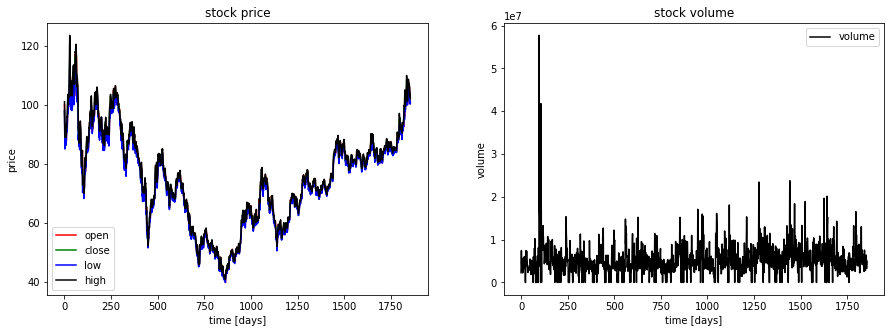

In [6]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.open.values, color='red', label='open')
plt.plot(df.close.values, color='green', label='close')
plt.plot(df.low.values, color='blue', label='low')
plt.plot(df.high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [7]:
df.describe()

,stock_id,open,close,high,low,volume
count,1856.0,1856.000000,1856.000000,1856.000000,1856.000000,1.856000e+03
mean,1.0,74.907031,74.869046,75.681492,74.070205,5.334605e+06
std,0.0,15.914997,15.908620,16.165828,15.681254,3.480975e+06
min,1.0,39.800000,40.500000,40.800000,39.800000,0.000000e+00
25%,1.0,63.000000,63.000000,64.000000,62.437500,3.512650e+06
50%,1.0,75.000000,74.750000,75.450000,74.000000,4.821650e+06
75%,1.0,85.500000,85.500000,86.375000,84.750000,6.571500e+06
max,1.0,122.000000,121.000000,123.500000,117.000000,5.774370e+07


In [8]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df.stock_id == 1].copy()
df_stock.drop(['stock_id'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'high', 'low']
x_train.shape =  (1468, 19, 4)
y_train.shape =  (1468, 4)
x_valid.shape =  (184, 19, 4)
y_valid.shape =  (184, 4)
x_test.shape =  (184, 19, 4)
y_test.shape =  (184, 4)


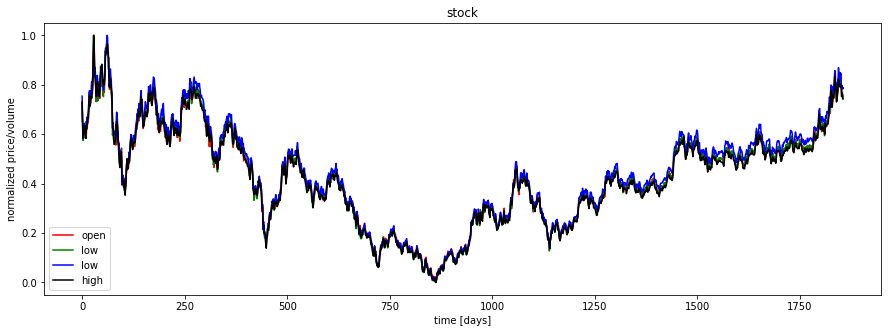

In [9]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [13]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.109754/0.153574
4.97 epochs: MSE train/valid = 0.001295/0.000697
9.95 epochs: MSE train/valid = 0.000962/0.000490
14.92 epochs: MSE train/valid = 0.000834/0.000396
19.89 epochs: MSE train/valid = 0.000726/0.000449
24.86 epochs: MSE train/valid = 0.000424/0.000208
29.84 epochs: MSE train/valid = 0.000361/0.000172
34.81 epochs: MSE train/valid = 0.000403/0.000270
39.78 epochs: MSE train/valid = 0.000285/0.000136
44.75 epochs: MSE train/valid = 0.000264/0.000123
49.73 epochs: MSE train/valid = 0.000433/0.000375
54.70 epochs: MSE train/valid = 0.000270/0.000160
59.67 epochs: MSE train/valid = 0.000249/0.000147
64.65 epochs: MSE train/valid = 0.000239/0.000115
69.62 epochs: MSE train/valid = 0.000238/0.000115
74.59 epochs: MSE train/valid = 0.000250/0.000131
79.56 epochs: MSE train/valid = 0.000241/0.000125
84.54 epochs: MSE train/valid = 0.000232/0.000114
89.51 epochs: MSE train/valid = 0.000230/0.000123
94.48 epochs: MSE train/valid = 0.000220/0.000099
99.

In [14]:
y_train.shape

(1468, 4)

correct sign prediction for close - open price for train/valid/test: 0.55/0.59/0.62


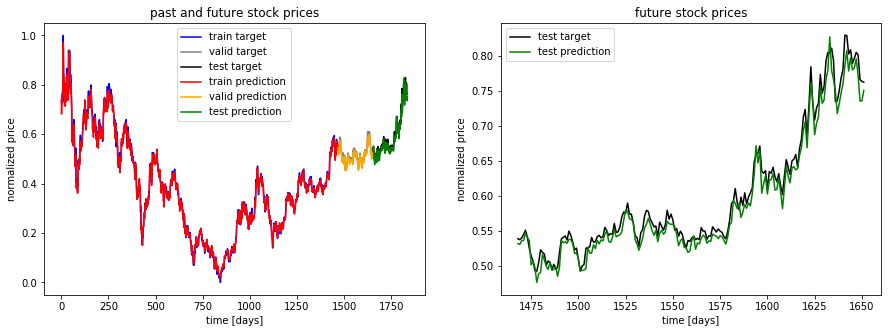

In [15]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))